## **Vehicle Manufacturing Company Data Analysis**

**--- Import Libraries**

In [25]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs
import json

# Import Data to JSON format using API


 **--- Get details from https://vpic.nhtsa.dot.gov/api/**

In [26]:
#!/usr/bin/env python3
url='https://vpic.nhtsa.dot.gov/api/vehicles/getallmanufacturers?format=json&page=2'
response=requests.get(url)
data=response.json()
data

{'Count': 100,
 'Message': 'Response returned successfully',
 'SearchCriteria': None,
 'Results': [{'Country': 'UNITED STATES (USA)',
   'Mfr_CommonName': 'Toyota',
   'Mfr_ID': 1090,
   'Mfr_Name': 'TOYOTA MOTOR MANUFACTURING, TEXAS, INC.',
   'VehicleTypes': []},
  {'Country': 'UNITED STATES (USA)',
   'Mfr_CommonName': 'Toyota',
   'Mfr_ID': 1091,
   'Mfr_Name': 'TOYOTA MOTOR MANUFACTURING, NORTHERN KENTUCKY, INC.',
   'VehicleTypes': []},
  {'Country': 'UNITED STATES (USA)',
   'Mfr_CommonName': 'Thomas Grinding',
   'Mfr_ID': 1092,
   'Mfr_Name': 'THOMAS GRINDING INC.',
   'VehicleTypes': [{'IsPrimary': True, 'Name': 'Trailer'}]},
  {'Country': 'UNITED STATES (USA)',
   'Mfr_CommonName': 'Morgan Trailers',
   'Mfr_ID': 1095,
   'Mfr_Name': 'MORGAN TRAILERS, INC',
   'VehicleTypes': [{'IsPrimary': True, 'Name': 'Trailer'}]},
  {'Country': 'UNITED STATES (USA)',
   'Mfr_CommonName': 'Altec',
   'Mfr_ID': 1096,
   'Mfr_Name': 'ALTEC ENVIRONMENTAL PRODUCTS, LLC',
   'VehicleTypes': []

**--- Create a dataframe from JSON with pandas**

In [27]:
df=pd.DataFrame(data['Results'])

df.shape
df


,Country,Mfr_CommonName,Mfr_ID,Mfr_Name,VehicleTypes
0,UNITED STATES (USA),Toyota,1090,"TOYOTA MOTOR MANUFACTURING, TEXAS, INC.",[]
1,UNITED STATES (USA),Toyota,1091,"TOYOTA MOTOR MANUFACTURING, NORTHERN KENTUCKY,...",[]
2,UNITED STATES (USA),Thomas Grinding,1092,THOMAS GRINDING INC.,"[{'IsPrimary': True, 'Name': 'Trailer'}]"
3,UNITED STATES (USA),Morgan Trailers,1095,"MORGAN TRAILERS, INC","[{'IsPrimary': True, 'Name': 'Trailer'}]"
4,UNITED STATES (USA),Altec,1096,"ALTEC ENVIRONMENTAL PRODUCTS, LLC",[]
...,...,...,...,...,...
95,UNITED STATES (USA),None,1207,"CREATIVE COACHWORKS, INC","[{'IsPrimary': False, 'Name': 'Multipurpose Pa..."
96,UNITED STATES (USA),Creative Sports Supply,1208,CREATIVE SPORTS SUPPLY LLC,"[{'IsPrimary': True, 'Name': 'Trailer'}]"
97,UNITED STATES (USA),Creep Cycle,1209,CREEP CYCLE WORKS INC.,"[{'IsPrimary': True, 'Name': 'Motorcycle'}]"
98,UNITED STATES (USA),Country Wagon,1211,COUNTRY WAGON TRAILERS,[]


**--- organising MFR_Name column values**

In [28]:
df['Mfr_Name']=df['Mfr_Name']
df['Mfr_Name'].head()
MfrName={}
for i in range(0,len(df['Mfr_Name'])):
    MfrName[i]=df['Mfr_Name'][i].split(",")[0]

MfrName
df['Mfr_Name']=MfrName.values()
df['Mfr_Name']


0       TOYOTA MOTOR MANUFACTURING
1       TOYOTA MOTOR MANUFACTURING
2             THOMAS GRINDING INC.
3                  MORGAN TRAILERS
4     ALTEC ENVIRONMENTAL PRODUCTS
                  ...             
95             CREATIVE COACHWORKS
96      CREATIVE SPORTS SUPPLY LLC
97          CREEP CYCLE WORKS INC.
98          COUNTRY WAGON TRAILERS
99         CUSTOM CHOPPERS BY OTIS
Name: Mfr_Name, Length: 100, dtype: object

**--- filling empty entries in Mfr_CommonName columns**

In [29]:
#filling empty entries in Mfr_CommonName columns
df['Mfr_CommonName']=df['Mfr_CommonName'].fillna('Unknown')
df['Mfr_CommonName']

0                      Toyota
1                      Toyota
2             Thomas Grinding
3             Morgan Trailers
4                       Altec
               ...           
95                    Unknown
96     Creative Sports Supply
97                Creep Cycle
98              Country Wagon
99    Custom Choppers by Otis
Name: Mfr_CommonName, Length: 100, dtype: object

**--- Updated Dataframe** 

In [30]:
df.head()

,Country,Mfr_CommonName,Mfr_ID,Mfr_Name,VehicleTypes
0,UNITED STATES (USA),Toyota,1090,TOYOTA MOTOR MANUFACTURING,[]
1,UNITED STATES (USA),Toyota,1091,TOYOTA MOTOR MANUFACTURING,[]
2,UNITED STATES (USA),Thomas Grinding,1092,THOMAS GRINDING INC.,"[{'IsPrimary': True, 'Name': 'Trailer'}]"
3,UNITED STATES (USA),Morgan Trailers,1095,MORGAN TRAILERS,"[{'IsPrimary': True, 'Name': 'Trailer'}]"
4,UNITED STATES (USA),Altec,1096,ALTEC ENVIRONMENTAL PRODUCTS,[]


**--- Cleaning and reformating VehicleTypes column data** 

In [31]:
df['VehicleTypes']

0                                                    []
1                                                    []
2              [{'IsPrimary': True, 'Name': 'Trailer'}]
3              [{'IsPrimary': True, 'Name': 'Trailer'}]
4                                                    []
                            ...                        
95    [{'IsPrimary': False, 'Name': 'Multipurpose Pa...
96             [{'IsPrimary': True, 'Name': 'Trailer'}]
97          [{'IsPrimary': True, 'Name': 'Motorcycle'}]
98                                                   []
99          [{'IsPrimary': True, 'Name': 'Motorcycle'}]
Name: VehicleTypes, Length: 100, dtype: object

In [32]:
type(df['VehicleTypes'])
df['VehicleTypes']

0                                                    []
1                                                    []
2              [{'IsPrimary': True, 'Name': 'Trailer'}]
3              [{'IsPrimary': True, 'Name': 'Trailer'}]
4                                                    []
                            ...                        
95    [{'IsPrimary': False, 'Name': 'Multipurpose Pa...
96             [{'IsPrimary': True, 'Name': 'Trailer'}]
97          [{'IsPrimary': True, 'Name': 'Motorcycle'}]
98                                                   []
99          [{'IsPrimary': True, 'Name': 'Motorcycle'}]
Name: VehicleTypes, Length: 100, dtype: object

In [33]:
df

,Country,Mfr_CommonName,Mfr_ID,Mfr_Name,VehicleTypes
0,UNITED STATES (USA),Toyota,1090,TOYOTA MOTOR MANUFACTURING,[]
1,UNITED STATES (USA),Toyota,1091,TOYOTA MOTOR MANUFACTURING,[]
2,UNITED STATES (USA),Thomas Grinding,1092,THOMAS GRINDING INC.,"[{'IsPrimary': True, 'Name': 'Trailer'}]"
3,UNITED STATES (USA),Morgan Trailers,1095,MORGAN TRAILERS,"[{'IsPrimary': True, 'Name': 'Trailer'}]"
4,UNITED STATES (USA),Altec,1096,ALTEC ENVIRONMENTAL PRODUCTS,[]
...,...,...,...,...,...
95,UNITED STATES (USA),Unknown,1207,CREATIVE COACHWORKS,"[{'IsPrimary': False, 'Name': 'Multipurpose Pa..."
96,UNITED STATES (USA),Creative Sports Supply,1208,CREATIVE SPORTS SUPPLY LLC,"[{'IsPrimary': True, 'Name': 'Trailer'}]"
97,UNITED STATES (USA),Creep Cycle,1209,CREEP CYCLE WORKS INC.,"[{'IsPrimary': True, 'Name': 'Motorcycle'}]"
98,UNITED STATES (USA),Country Wagon,1211,COUNTRY WAGON TRAILERS,[]


In [34]:
# Function to process VehicleTypes column
def process_vehicle_type(entry):
    if isinstance(entry, list) and len(entry) > 0:
        return entry[0].get('Name',None)
    else:
        return 'Unknown'  # Return 'Unknown' if entry is not a list

# Apply transformation
df["VehicleTypes"] = df["VehicleTypes"].apply(process_vehicle_type)

df

,Country,Mfr_CommonName,Mfr_ID,Mfr_Name,VehicleTypes
0,UNITED STATES (USA),Toyota,1090,TOYOTA MOTOR MANUFACTURING,Unknown
1,UNITED STATES (USA),Toyota,1091,TOYOTA MOTOR MANUFACTURING,Unknown
2,UNITED STATES (USA),Thomas Grinding,1092,THOMAS GRINDING INC.,Trailer
3,UNITED STATES (USA),Morgan Trailers,1095,MORGAN TRAILERS,Trailer
4,UNITED STATES (USA),Altec,1096,ALTEC ENVIRONMENTAL PRODUCTS,Unknown
...,...,...,...,...,...
95,UNITED STATES (USA),Unknown,1207,CREATIVE COACHWORKS,Multipurpose Passenger Vehicle (MPV)
96,UNITED STATES (USA),Creative Sports Supply,1208,CREATIVE SPORTS SUPPLY LLC,Trailer
97,UNITED STATES (USA),Creep Cycle,1209,CREEP CYCLE WORKS INC.,Motorcycle
98,UNITED STATES (USA),Country Wagon,1211,COUNTRY WAGON TRAILERS,Unknown


**--- UNknown Entries in VehicleTypes Column** 

In [35]:
#count of only Unknown values in VehicleTypes column
df['VehicleTypes'].value_counts()['Unknown']


23

**--- Final Dataframe**  

In [36]:
df

,Country,Mfr_CommonName,Mfr_ID,Mfr_Name,VehicleTypes
0,UNITED STATES (USA),Toyota,1090,TOYOTA MOTOR MANUFACTURING,Unknown
1,UNITED STATES (USA),Toyota,1091,TOYOTA MOTOR MANUFACTURING,Unknown
2,UNITED STATES (USA),Thomas Grinding,1092,THOMAS GRINDING INC.,Trailer
3,UNITED STATES (USA),Morgan Trailers,1095,MORGAN TRAILERS,Trailer
4,UNITED STATES (USA),Altec,1096,ALTEC ENVIRONMENTAL PRODUCTS,Unknown
...,...,...,...,...,...
95,UNITED STATES (USA),Unknown,1207,CREATIVE COACHWORKS,Multipurpose Passenger Vehicle (MPV)
96,UNITED STATES (USA),Creative Sports Supply,1208,CREATIVE SPORTS SUPPLY LLC,Trailer
97,UNITED STATES (USA),Creep Cycle,1209,CREEP CYCLE WORKS INC.,Motorcycle
98,UNITED STATES (USA),Country Wagon,1211,COUNTRY WAGON TRAILERS,Unknown


**--- Export Data to CSV**  

In [37]:
df.to_csv('vehicle_manufacturers.csv',index=False)

# Import CSV Data to Database using sqlite3

**--- Create Database and table and import CSV data**  

In [38]:
import pandas as pd
import sqlite3

# Load the CSV file
#csv_file = "C:\Users\Sumit\Documents\Work_Drive\edureka\Python_edureka\vehicle_manufacturers.csv"

# Read CSV into a DataFrame
df = pd.read_csv('vehicle_manufacturers.csv')

# Convert empty lists to NaN in 'VehicleTypes' column
#df['VehicleTypes'] = df['VehicleTypes'].apply(lambda x: None if x == '[]' else x)

# Create a connection to SQLite database
db_file = "vehicles.db"  # Database file
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

# Create table (assuming column names from CSV)
df.to_sql("manufacturers", conn, if_exists="replace", index=False)

# Commit and close connection
conn.commit()
conn.close()

print("Database created successfully! Data imported into 'manufacturers' table.")


Database created successfully! Data imported into 'manufacturers' table.


**--- Display manufactureres table data**  

In [39]:
# Reconnect to the database
conn = sqlite3.connect(db_file)

# Query the data
query = "SELECT * FROM manufacturers;"
df_query = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Display results
df_query


,Country,Mfr_CommonName,Mfr_ID,Mfr_Name,VehicleTypes
0,UNITED STATES (USA),Toyota,1090,TOYOTA MOTOR MANUFACTURING,Unknown
1,UNITED STATES (USA),Toyota,1091,TOYOTA MOTOR MANUFACTURING,Unknown
2,UNITED STATES (USA),Thomas Grinding,1092,THOMAS GRINDING INC.,Trailer
3,UNITED STATES (USA),Morgan Trailers,1095,MORGAN TRAILERS,Trailer
4,UNITED STATES (USA),Altec,1096,ALTEC ENVIRONMENTAL PRODUCTS,Unknown
...,...,...,...,...,...
95,UNITED STATES (USA),Unknown,1207,CREATIVE COACHWORKS,Multipurpose Passenger Vehicle (MPV)
96,UNITED STATES (USA),Creative Sports Supply,1208,CREATIVE SPORTS SUPPLY LLC,Trailer
97,UNITED STATES (USA),Creep Cycle,1209,CREEP CYCLE WORKS INC.,Motorcycle
98,UNITED STATES (USA),Country Wagon,1211,COUNTRY WAGON TRAILERS,Unknown


**--- Display Number of table present in vehicle database**  

In [40]:
import sqlite3

# Connect to the SQLite database
db_file = "vehicles.db"
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

# Query to list all tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch and print table names
tables = cursor.fetchall()
print("Tables in the database:", tables)

# Close connection
conn.commit()
conn.close()


Tables in the database: [('manufacturers',)]


**--- Droping Table** 

In [41]:
import sqlite3

# Connect to the SQLite database
db_file = "vehicles.db"
conn = sqlite3.connect(db_file)
cursor = conn.cursor()

# Query to list all tables
cursor.execute("DROP TABLE manufacturers;")
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch and print table names
tables = cursor.fetchall()
print("Tables in the database:", tables)

# Close connection
conn.commit()
conn.close()

Tables in the database: []


**--- Droping Databse/Databse file**

In [42]:
import sqlite3
import os

db_file = "vehicles.db"

# First, close any open connection (if exists)
try:
    conn = sqlite3.connect(db_file)
    conn.close()
except Exception as e:
    print("Error closing connection:", e)

# Now, delete the database file
try:
    os.remove(db_file)
    print("Database file deleted successfully.")
except PermissionError:
    print("Close all applications using 'vehicles.db' and try again.")




Database file deleted successfully.


# Data Visualisation 

**--- Import Library Section**  

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
df

,Country,Mfr_CommonName,Mfr_ID,Mfr_Name,VehicleTypes
0,UNITED STATES (USA),Toyota,1090,TOYOTA MOTOR MANUFACTURING,Unknown
1,UNITED STATES (USA),Toyota,1091,TOYOTA MOTOR MANUFACTURING,Unknown
2,UNITED STATES (USA),Thomas Grinding,1092,THOMAS GRINDING INC.,Trailer
3,UNITED STATES (USA),Morgan Trailers,1095,MORGAN TRAILERS,Trailer
4,UNITED STATES (USA),Altec,1096,ALTEC ENVIRONMENTAL PRODUCTS,Unknown
...,...,...,...,...,...
95,UNITED STATES (USA),Unknown,1207,CREATIVE COACHWORKS,Multipurpose Passenger Vehicle (MPV)
96,UNITED STATES (USA),Creative Sports Supply,1208,CREATIVE SPORTS SUPPLY LLC,Trailer
97,UNITED STATES (USA),Creep Cycle,1209,CREEP CYCLE WORKS INC.,Motorcycle
98,UNITED STATES (USA),Country Wagon,1211,COUNTRY WAGON TRAILERS,Unknown


**--- Bar plot for Number of Vehicle Types available**  

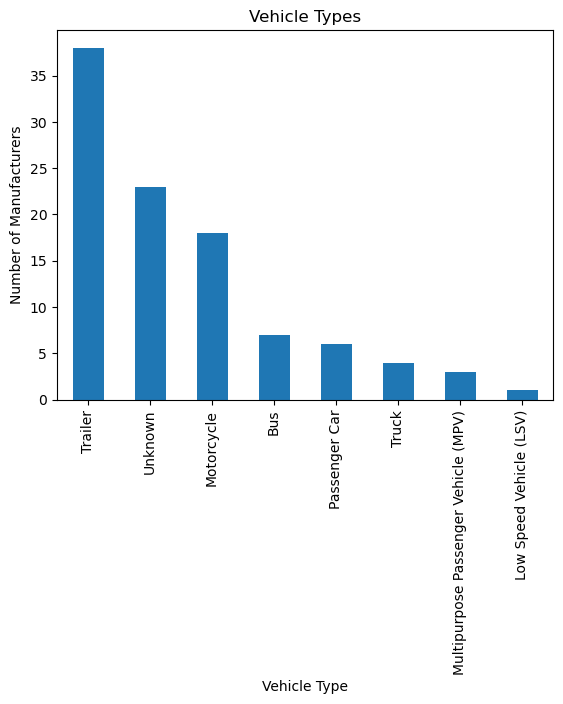

In [44]:
# plot data country with number of manufacture name with vehicle type in legend
df['VehicleTypes'].value_counts().plot(kind='bar')
plt.title('Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Manufacturers')
plt.show()



**--- plot for Country wise manufacturers**  

Text(0.5, 1.0, 'Number of Vehicles by Country')

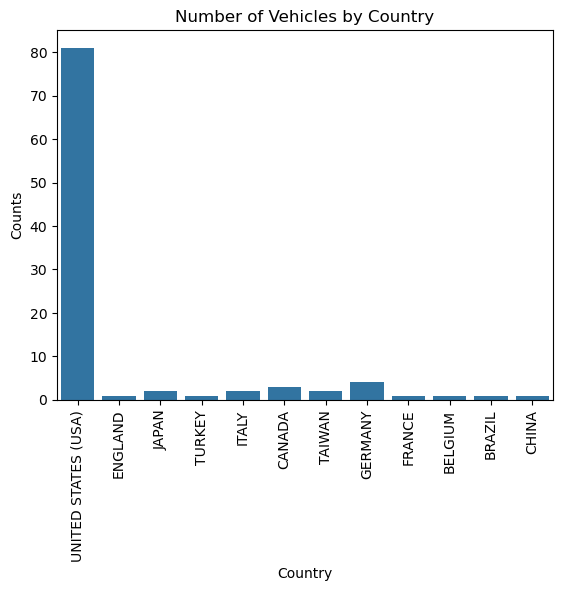

In [45]:
sns.countplot(x='Country', data=df)
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Counts')
plt.title('Number of Vehicles by Country')

In [46]:
plt.show()


In [49]:
!jupyter nbconvert --to script Sahoo_Sumit_ProjectWork1_VehiclemanufactureDetails.ipynb

[NbConvertApp] Converting notebook Sahoo_Sumit_ProjectWork1_VehiclemanufactureDetails.ipynb to script
[NbConvertApp] Writing 5243 bytes to Sahoo_Sumit_ProjectWork1_VehiclemanufactureDetails.py
